<a href="https://colab.research.google.com/github/deepakboharachhetri/AI_lab/blob/main/knn_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Multi-Class Classification (Species A, B, C) ===
Accuracy on test split: 66.67%
Prediction for test point [6.0, 3.0, 4.5]: Species C

=== Binary kNN Visualization with Decision Boundary ===


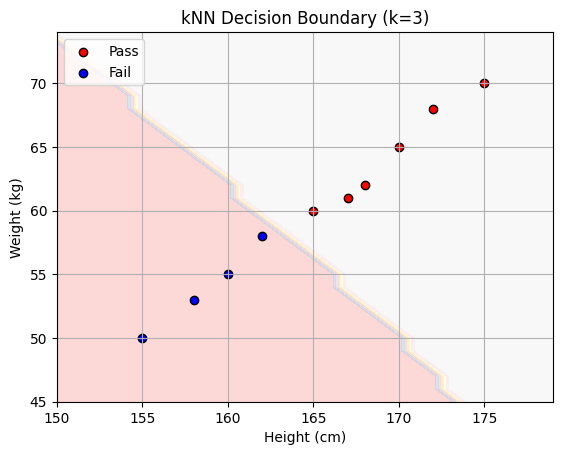

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

# === Euclidean Distance Function ===
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# === kNN Classifier ===
def knn_classifier(train_data, train_labels, test_point, k):
    distances = [(euclidean_distance(test_point, data), label)
                 for data, label in zip(train_data, train_labels)]
    distances.sort()
    k_nearest = [label for _, label in distances[:k]]
    prediction = Counter(k_nearest).most_common(1)[0][0]
    return prediction

# === Accuracy Calculation ===
def compute_accuracy(X_train, y_train, X_test, y_test, k):
    correct = 0
    for x, y_true in zip(X_test, y_test):
        y_pred = knn_classifier(X_train, y_train, x, k)
        if y_pred == y_true:
            correct += 1
    return correct / len(y_test)

# === Task 1: Multi-Class kNN with 3 Features ===
def multi_class_knn():
    print("=== Multi-Class Classification (Species A, B, C) ===")
    dataset = [
        [5.1, 3.5, 1.4], [4.9, 3.0, 1.3], [5.0, 3.4, 1.5],   # Species A = 0
        [7.0, 3.2, 4.7], [6.4, 3.2, 4.5], [6.9, 3.1, 4.9],   # Species B = 1
        [5.5, 2.3, 4.0], [6.5, 2.8, 4.6], [5.7, 2.8, 4.1],   # Species C = 2
        [6.3, 3.3, 6.0], [5.8, 2.7, 5.1], [6.1, 3.0, 4.8]    # Species C = 2
    ]
    labels = [0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2]
    k = 5

    X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)
    accuracy = compute_accuracy(X_train, y_train, X_test, y_test, k)

    print(f"Accuracy on test split: {accuracy * 100:.2f}%")

    test_point = [6.0, 3.0, 4.5]
    prediction = knn_classifier(X_train, y_train, test_point, k)
    print(f"Prediction for test point {test_point}: Species {['A', 'B', 'C'][prediction]}")

# === Task 2: Visualization for Binary Classification (2 Features) ===
def binary_knn_visualization():
    print("\n=== Binary kNN Visualization with Decision Boundary ===")

    # Sample binary dataset: height (x), weight (y), class: 1=Pass, 0=Fail
    data = [
        [165, 60], [170, 65], [160, 55], [175, 70], [155, 50],
        [168, 62], [162, 58], [172, 68], [158, 53], [167, 61]
    ]
    labels = [1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
    k = 3

    # Define grid
    x_min, x_max = 150, 180
    y_min, y_max = 45, 75
    step = 1.0

    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = np.array([
        knn_classifier(data, labels, [x, y], k)
        for x, y in zip(xx.ravel(), yy.ravel())
    ])
    Z = Z.reshape(xx.shape)

    # Plot background
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.5)

    # Plot actual points
    for point, label in zip(data, labels):
        color = 'red' if label == 1 else 'blue'
        plt.scatter(point[0], point[1], c=color, edgecolor='black', label='Pass' if label == 1 else 'Fail')

    plt.title(f"kNN Decision Boundary (k={k})")
    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")
    plt.grid(True)
    # Remove duplicate legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

# === Run All ===
if __name__ == "__main__":
    multi_class_knn()
    binary_knn_visualization()
